In [ ]:
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
classificador_sentimento = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

In [ ]:
classificador_sentimento('I love this product')

[{'label': 'POSITIVE', 'score': 0.9998788833618164}]

In [ ]:
classificador_sentimento('I am totally disappointed in this product')

[{'label': 'NEGATIVE', 'score': 0.9997952580451965}]

In [ ]:
pip install pysentimiento

In [ ]:
from pysentimiento import create_analyzer

In [ ]:
modelo_analise_sentimento = create_analyzer(task='sentiment', lang='pt')

In [ ]:
modelo_analise_sentimento.predict('''
A fritadeira é sensacional, muito além do que imaginava. É linda, super
funcional e muito fácil de manusear. Fácil de limpar e potente. Super
recomendo.
''')

AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002})

In [ ]:
modelo_analise_sentimento.predict('''
Após poucos meses de uso a carcaça de aço escovado começou a oxidar,
demonstrando a baixa qualidade de proteção. Fora esse detalhe, o
produto cumpre o prometido.
''')

AnalyzerOutput(output=NEU, probas={NEU: 0.921, NEG: 0.065, POS: 0.014})

In [ ]:
modelo_analise_sentimento.predict('''
Em menos de 1 ano parou de funcionar, enviei para assistência técnica
por estar na garantia, trocaram o motor, passou a ficar menos potente e
não durou 2 utilizações. Isso se repetiu várias vezes, até que desisti
de ficar levando lá e queimando de novo em seguida, vi outros clientes
com o mesmo problema. Não comprem!!
''')

AnalyzerOutput(output=NEG, probas={NEG: 0.948, NEU: 0.037, POS: 0.015})

In [ ]:
import pandas as pd
dados = pd.read_csv('resenhas.csv')
dados

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...
5,657,"Usei ela algumas vezes já, muito silenciosa, l..."
6,182,"Superou minhas expectativas, por enquanto tudo..."
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo..."
8,343,"Estou muito satisfeito com a negociação, receb..."
9,624,Lindaaaa amei super indico


In [ ]:
resultado_previsao = modelo_analise_sentimento.predict(dados['Resenha'])
resultado_previsao

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

[AnalyzerOutput(output=POS, probas={POS: 0.989, NEU: 0.009, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.670, NEU: 0.320, NEG: 0.011}),
 AnalyzerOutput(output=POS, probas={POS: 0.900, NEU: 0.097, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.731, NEU: 0.259, POS: 0.010}),
 AnalyzerOutput(output=POS, probas={POS: 0.976, NEU: 0.021, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.956, NEU: 0.037, NEG: 0.007}),
 AnalyzerOutput(output=POS, probas={POS: 0.838, NEU: 0.093, NEG: 0.069}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.008, NEG: 0.002}),
 AnalyzerOutput(output=POS, probas={POS: 0.961, NEU: 0.036, NEG: 0.003}),
 AnalyzerOutput(output=POS, probas={POS: 0.990, NEU: 0.007, NEG: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.896, NEU: 0.100, POS: 0.004}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.990, NEU: 0.008, POS: 0.003}),
 AnalyzerOutput(output=NEG, probas={NEG: 0.985, NEU: 0.011, POS: 0.003}),
 AnalyzerOutput(output=NEU, probas={NE

In [ ]:
sentimento = []
for resultado in resultado_previsao:
  sentimento.append(resultado.output)
sentimento

['POS',
 'POS',
 'POS',
 'NEG',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'POS',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEU',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'NEG',
 'POS',
 'POS',
 'NEU',
 'POS',
 'POS']

In [ ]:
dados['Sentimento'] = sentimento
dados

,ID,Resenha,Sentimento
0,24,"A fritadeira é sensacional, muito além do que ...",POS
1,733,"Após usar o produto, achei-o fácil e muito efi...",POS
2,865,"Muito funcional, prática e moderna.",POS
3,809,"Boa, mas não das melhores pois a frente de vid...",NEG
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...,POS
5,657,"Usei ela algumas vezes já, muito silenciosa, l...",POS
6,182,"Superou minhas expectativas, por enquanto tudo...",POS
7,815,"Chegou no prazo. Amei, é muito linda. Não vejo...",POS
8,343,"Estou muito satisfeito com a negociação, receb...",POS
9,624,Lindaaaa amei super indico,POS


In [ ]:
df_sentimento = dados.groupby('Sentimento').size().reset_index(name='Contagem')
df_sentimento.head()

,Sentimento,Contagem
0,NEG,19
1,NEU,4
2,POS,13


In [ ]:
import plotly.express as px
fig = px.bar(df_sentimento, x='Sentimento', y='Contagem', title='Contagem de Resenhas por Sentimento')
fig.show()

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
# Carregar stopwords em português
nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
portuguese_stopwords

{'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'estamos',
 'estar',
 'estas',
 'estava',
 'estavam',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéramos',
 'estivéssemos',
 'estou',
 'está',
 'estávamos',
 'estão',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fui',
 'fôramos',
 'fôssemos',
 'haja',
 'hajam',
 'hajamos',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houveram',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houvermos',
 'houverá',
 'houverão',
 'houverí

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
def nuvem_palavras(texto, coluna_texto, sentimento):
 # Filtrando as resenhas com base no sentimento especificado
 texto_sentimento = texto.query(f"Sentimento == '{sentimento}'")[coluna_texto]
 # Unindo todas as resenhas em uma única string
 texto_unido = " ".join(texto_sentimento)
 # Dividindo o texto em palavras e filtrando com stopwords
 palavras = texto_unido.split()
 palavras_filtradas = [palavra for palavra in palavras if palavra not in portuguese_stopwords]
 texto_filtrado = " ".join(palavras_filtradas)
 # Criando e exibindo a nuvem de palavras
 nuvem_palavras = WordCloud(width=800, height=500, max_words=50).generate(texto_filtrado)
 plt.figure(figsize=(10, 7))
 plt.imshow(nuvem_palavras, interpolation='bilinear')
 plt.axis('off')
 plt.show()

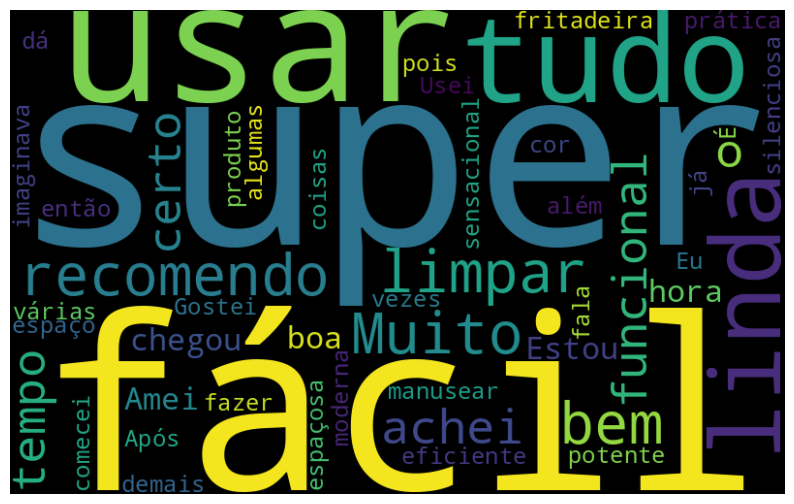

In [ ]:
nuvem_palavras(dados, 'Resenha', 'POS')

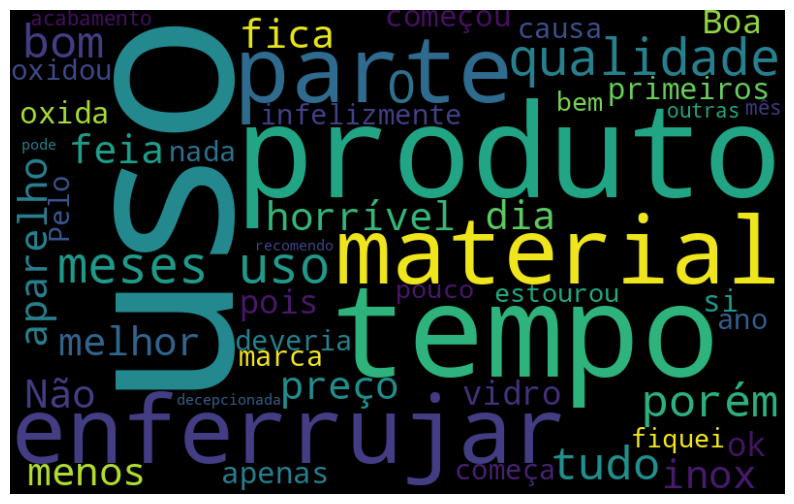

In [ ]:
nuvem_palavras(dados, 'Resenha', 'NEG')